In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import svm, datasets

In [8]:
df = pd.read_csv('F:\\Campus\\Research\\datasets\\aws\\aws.csv')
df.head()

C:\Users\shali\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (11,29,30,31,32,33,34,35,37,40,41,42,43,44,45,46,52,55,56,79,80,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SKU,OfferTermCode,RateCode,TermType,PriceDescription,EffectiveDate,StartingRange,EndingRange,Unit,PricePerUnit,...,Intel AVX2 Available,Intel Turbo Available,Normalization Size Factor,Physical Cores,Pre Installed S/W,Processor Features,Product Type,Resource Type,serviceName,Volume API Name
0,YQHNG5NBWUE3D67S,4NA7Y494T4,YQHNG5NBWUE3D67S.4NA7Y494T4.6YS6EN2CT7,Reserved,"Red Hat Enterprise Linux (Amazon VPC), m4.xlar...",2017-04-30,0.0,inf,Hrs,0.1963,...,Yes,Yes,8.0,NaN,NaN,Intel AVX; Intel AVX2; Intel Turbo,NaN,NaN,Amazon Elastic Compute Cloud,NaN
1,38UAGGZF2TPDQSYB,Z2E3P23VKM,38UAGGZF2TPDQSYB.Z2E3P23VKM.6YS6EN2CT7,Reserved,"Linux/UNIX (Amazon VPC), t4g.medium reserved i...",2020-09-01,0.0,inf,Hrs,0.0167,...,No,No,2.0,NaN,NaN,NaN,NaN,NaN,Amazon Elastic Compute Cloud,NaN
2,FS9HBBMCNT422SDM,38NPMPTW36,FS9HBBMCNT422SDM.38NPMPTW36.6YS6EN2CT7,Reserved,Windows with SQL Server Enterprise (Amazon VPC...,2020-04-01,0.0,inf,Hrs,22.0310,...,No,No,192.0,NaN,SQL Ent,NaN,NaN,NaN,Amazon Elastic Compute Cloud,NaN
3,AF4M9XS62QDH5P8S,BPH4J8HBKS,AF4M9XS62QDH5P8S.BPH4J8HBKS.6YS6EN2CT7,Reserved,"Linux/UNIX (Amazon VPC), i3.xlarge reserved in...",2017-04-30,0.0,inf,Hrs,0.1950,...,Yes,Yes,8.0,NaN,NaN,Intel AVX; Intel AVX2; Intel Turbo,NaN,NaN,Amazon Elastic Compute Cloud,NaN
4,TDQJ4JGM4HQ9852M,R5XV2EPZQZ,TDQJ4JGM4HQ9852M.R5XV2EPZQZ.2TG2D8R56U,Reserved,Upfront Fee,2018-03-31,NaN,NaN,Quantity,6972.0000,...,Yes,Yes,4.0,NaN,SQL Std,Intel AVX; Intel AVX2; Intel Turbo,NaN,NaN,Amazon Elastic Compute Cloud,NaN


In [9]:
len(df.columns

SyntaxError: unexpected EOF while parsing (<ipython-input-9-15a70b45190d>, line 1)

In [57]:
ncolumns = ['EffectiveDate','Unit', 'PricePerUnit', 'Currency', 'LeaseContractLength', 'PurchaseOption', 'OfferingClass', 'Location', 'Location Type', 'Instance Type','Instance Family', 'Memory', 'vCPU', 'Network Performance', 'Clock Speed']
# df = df.reindex(columns=ncolumns)
df = df[ncolumns]

df_init = df.copy()
df_init.head()

,EffectiveDate,Unit,PricePerUnit,Currency,LeaseContractLength,PurchaseOption,OfferingClass,Location,Location Type,Instance Type,Instance Family,Memory,vCPU,Network Performance,Clock Speed
0,2017-04-30,Hrs,0.1963,USD,1yr,No Upfront,standard,US East (Ohio),AWS Region,m4.xlarge,General purpose,16 GiB,4.0,High,2.4 GHz
1,2020-09-01,Hrs,0.0167,USD,3yr,No Upfront,convertible,US West (Oregon),AWS Region,t4g.medium,General purpose,4 GiB,2.0,Up to 5 Gigabit,2.5 GHz
2,2020-04-01,Hrs,22.0310,USD,3yr,Partial Upfront,standard,AWS GovCloud (US-West),AWS Region,r5dn.metal,Memory optimized,768 GiB,96.0,100 Gigabit,3.1 GHz
3,2017-04-30,Hrs,0.1950,USD,3yr,No Upfront,standard,Asia Pacific (Tokyo),AWS Region,i3.xlarge,Storage optimized,30.5 GiB,4.0,Up to 10 Gigabit,2.3 GHz
4,2018-03-31,Quantity,6972.0000,USD,3yr,Partial Upfront,convertible,US East (N. Virginia),AWS Region,m4.large,General purpose,8 GiB,2.0,Moderate,2.4 GHz


In [58]:
df_init.columns = [column.replace(' ', '_') for column in df_init.columns]
df_init.head()

,EffectiveDate,Unit,PricePerUnit,Currency,LeaseContractLength,PurchaseOption,OfferingClass,Location,Location_Type,Instance_Type,Instance_Family,Memory,vCPU,Network_Performance,Clock_Speed
0,2017-04-30,Hrs,0.1963,USD,1yr,No Upfront,standard,US East (Ohio),AWS Region,m4.xlarge,General purpose,16 GiB,4.0,High,2.4 GHz
1,2020-09-01,Hrs,0.0167,USD,3yr,No Upfront,convertible,US West (Oregon),AWS Region,t4g.medium,General purpose,4 GiB,2.0,Up to 5 Gigabit,2.5 GHz
2,2020-04-01,Hrs,22.0310,USD,3yr,Partial Upfront,standard,AWS GovCloud (US-West),AWS Region,r5dn.metal,Memory optimized,768 GiB,96.0,100 Gigabit,3.1 GHz
3,2017-04-30,Hrs,0.1950,USD,3yr,No Upfront,standard,Asia Pacific (Tokyo),AWS Region,i3.xlarge,Storage optimized,30.5 GiB,4.0,Up to 10 Gigabit,2.3 GHz
4,2018-03-31,Quantity,6972.0000,USD,3yr,Partial Upfront,convertible,US East (N. Virginia),AWS Region,m4.large,General purpose,8 GiB,2.0,Moderate,2.4 GHz


In [59]:
df_init["EffectiveDate"] = df_init["EffectiveDate"].astype("datetime64")
df_init["PricePerUnit"] = df_init["PricePerUnit"].astype(float)
print(df_init.dtypes)

EffectiveDate          datetime64[ns]
Unit                           object
PricePerUnit                  float64
Currency                       object
LeaseContractLength            object
PurchaseOption                 object
OfferingClass                  object
Location                       object
Location_Type                  object
Instance_Type                  object
Instance_Family                object
Memory                         object
vCPU                          float64
Network_Performance            object
Clock_Speed                    object
dtype: object


In [60]:
df_init.isnull().sum()

EffectiveDate               0
Unit                        0
PricePerUnit                0
Currency                    0
LeaseContractLength    286975
PurchaseOption         286975
OfferingClass          286975
Location                  170
Location_Type             170
Instance_Type            1158
Instance_Family          1158
Memory                   7707
vCPU                     1158
Network_Performance      7712
Clock_Speed             54535
dtype: int64

In [61]:
# Drop all rows with NaNs in Location OR Memory OR Network Performance OR Instance Type
nan_columns = ['Location','Instance_Type','Instance_Family', 'Memory', 'Clock_Speed', 'Network_Performance']

for column in nan_columns:
     df_init.dropna(subset = [column], inplace=True)

df_init.isnull().sum()

EffectiveDate               0
Unit                        0
PricePerUnit                0
Currency                    0
LeaseContractLength    277273
PurchaseOption         277273
OfferingClass          277273
Location                    0
Location_Type               0
Instance_Type               0
Instance_Family             0
Memory                      0
vCPU                        0
Network_Performance         0
Clock_Speed                 0
dtype: int64

In [62]:
df_init['Location_Type'].value_counts()

AWS Region             1835080
AWS Wavelength Zone       1418
AWS Local Zone             405
Name: Location_Type, dtype: int64

In [63]:
# According to Above results, other types have small number of rows, then we can drop that column because only one column type remain after remove other rows.
# df_init = df_init[df_init['Location Type'] =='AWS Region'] 
# df_init['Location Type'].value_counts()
del df_init['Location_Type']
df_init.head()

,EffectiveDate,Unit,PricePerUnit,Currency,LeaseContractLength,PurchaseOption,OfferingClass,Location,Instance_Type,Instance_Family,Memory,vCPU,Network_Performance,Clock_Speed
0,2017-04-30,Hrs,0.1963,USD,1yr,No Upfront,standard,US East (Ohio),m4.xlarge,General purpose,16 GiB,4.0,High,2.4 GHz
1,2020-09-01,Hrs,0.0167,USD,3yr,No Upfront,convertible,US West (Oregon),t4g.medium,General purpose,4 GiB,2.0,Up to 5 Gigabit,2.5 GHz
2,2020-04-01,Hrs,22.0310,USD,3yr,Partial Upfront,standard,AWS GovCloud (US-West),r5dn.metal,Memory optimized,768 GiB,96.0,100 Gigabit,3.1 GHz
3,2017-04-30,Hrs,0.1950,USD,3yr,No Upfront,standard,Asia Pacific (Tokyo),i3.xlarge,Storage optimized,30.5 GiB,4.0,Up to 10 Gigabit,2.3 GHz
4,2018-03-31,Quantity,6972.0000,USD,3yr,Partial Upfront,convertible,US East (N. Virginia),m4.large,General purpose,8 GiB,2.0,Moderate,2.4 GHz


In [64]:
df_init['Currency'].value_counts()

USD    1836903
Name: Currency, dtype: int64

In [65]:
# Currency has only one type, then that column can remove
del df_init['Currency']
df_init.head()

,EffectiveDate,Unit,PricePerUnit,LeaseContractLength,PurchaseOption,OfferingClass,Location,Instance_Type,Instance_Family,Memory,vCPU,Network_Performance,Clock_Speed
0,2017-04-30,Hrs,0.1963,1yr,No Upfront,standard,US East (Ohio),m4.xlarge,General purpose,16 GiB,4.0,High,2.4 GHz
1,2020-09-01,Hrs,0.0167,3yr,No Upfront,convertible,US West (Oregon),t4g.medium,General purpose,4 GiB,2.0,Up to 5 Gigabit,2.5 GHz
2,2020-04-01,Hrs,22.0310,3yr,Partial Upfront,standard,AWS GovCloud (US-West),r5dn.metal,Memory optimized,768 GiB,96.0,100 Gigabit,3.1 GHz
3,2017-04-30,Hrs,0.1950,3yr,No Upfront,standard,Asia Pacific (Tokyo),i3.xlarge,Storage optimized,30.5 GiB,4.0,Up to 10 Gigabit,2.3 GHz
4,2018-03-31,Quantity,6972.0000,3yr,Partial Upfront,convertible,US East (N. Virginia),m4.large,General purpose,8 GiB,2.0,Moderate,2.4 GHz


In [66]:
# 'Unit' column has many types rows. So, we can see same category as same name like ['Hrs', 'Hours', 'hours'], ['Quantity', 'Count']. 
# Other type has diffeent meaning, as well as those types have only small number of quantity
# We can merger 'hours' and 'Quantity', and others can remove
df_init = df_init[(df_init['Unit'] =='Hours') | (df_init['Unit'] =='Hrs') | (df_init['Unit'] =='Quantity') | (df_init['Unit'] =='Count')]
num_of_unit_categories = {'Hours': 'Hours','Hrs': 'Hours', 'hours': 'Hours', 'Count':'Quantity','Quantity':'Quantity'}
df_init['Unit'] = [num_of_unit_categories[x] for x in df_init['Unit']]
df_init['Unit'].value_counts()

# 'Quantity' means 'Upfront Fee' rows, and 'Hours' means 'On Demand' rows

Hours       1211171
Quantity     625732
Name: Unit, dtype: int64

In [67]:
df_init['Instance_Family'].value_counts()

Memory optimized     596813
General purpose      558772
Compute optimized    408840
Storage optimized    203059
GPU instance          67561
FPGA Instances         1858
Name: Instance_Family, dtype: int64

In [68]:
df_init['Year'] = pd.DatetimeIndex(df_init['EffectiveDate']).year 
# df_init['Month'] = pd.DatetimeIndex(df_init['EffectiveDate']).month
del df_init['EffectiveDate']
df_init.head()

,Unit,PricePerUnit,LeaseContractLength,PurchaseOption,OfferingClass,Location,Instance_Type,Instance_Family,Memory,vCPU,Network_Performance,Clock_Speed,Year
0,Hours,0.1963,1yr,No Upfront,standard,US East (Ohio),m4.xlarge,General purpose,16 GiB,4.0,High,2.4 GHz,2017
1,Hours,0.0167,3yr,No Upfront,convertible,US West (Oregon),t4g.medium,General purpose,4 GiB,2.0,Up to 5 Gigabit,2.5 GHz,2020
2,Hours,22.0310,3yr,Partial Upfront,standard,AWS GovCloud (US-West),r5dn.metal,Memory optimized,768 GiB,96.0,100 Gigabit,3.1 GHz,2020
3,Hours,0.1950,3yr,No Upfront,standard,Asia Pacific (Tokyo),i3.xlarge,Storage optimized,30.5 GiB,4.0,Up to 10 Gigabit,2.3 GHz,2017
4,Quantity,6972.0000,3yr,Partial Upfront,convertible,US East (N. Virginia),m4.large,General purpose,8 GiB,2.0,Moderate,2.4 GHz,2018


In [69]:
df_init['Location'].value_counts()

US West (Oregon)                              125644
US East (N. Virginia)                         125509
EU (Ireland)                                  121275
Asia Pacific (Tokyo)                          116336
EU (Frankfurt)                                115565
Asia Pacific (Singapore)                      115464
US East (Ohio)                                113092
Asia Pacific (Sydney)                          96945
AWS GovCloud (US-West)                         96286
US West (N. California)                        89616
Asia Pacific (Seoul)                           82465
Asia Pacific (Mumbai)                          82023
South America (Sao Paulo)                      81897
Canada (Central)                               76338
EU (London)                                    75259
EU (Paris)                                     54681
AWS GovCloud (US-East)                         54456
EU (Stockholm)                                 45464
Asia Pacific (Hong Kong)                      

In [70]:
df_init['Network_Performance'].value_counts()

Up to 10 Gigabit    619877
10 Gigabit          235828
25 Gigabit          222909
Up to 25 Gigabit    159373
20 Gigabit          133870
High                116369
100 Gigabit          76645
Up to 5 Gigabit      67638
12 Gigabit           58323
Moderate             57326
50 Gigabit           54842
75 Gigabit           15912
Low to Moderate       9149
Up to 15 Gigabit      5520
40 Gigabit            1380
Low                   1162
15 Gigabit             564
400 Gigabit            216
Name: Network_Performance, dtype: int64

In [71]:
# We can see lot of country locations. So, some are low numbers of rows, then we can combine those as general location
num_of_network_performance_categories = {
    'Low': 'Up to 5 Gigabit',
    'Up to 5 Gigabit': 'Up to 5 Gigabit',
    'Up to 10 Gigabit': 'Up to 10 Gigabit',
    '10 Gigabit': '10 Gigabit', 
    '12 Gigabit': '12 Gigabit',
    'Low to Moderate': '12 Gigabit',
    'Up to 15 Gigabit': '12 Gigabit',
    '15 Gigabit': '12 Gigabit',
    'Moderate': '20 Gigabit',
    '20 Gigabit': '20 Gigabit', 
    'High':'High', 
    'Up to 25 Gigabit': 'Up to 25 Gigabit',
    '25 Gigabit': '25 Gigabit', 
    '40 Gigabit':'25 Gigabit',
    '100 Gigabit':'100 Gigabit',
    '50 Gigabit':'100 Gigabit',
    '75 Gigabit':'100 Gigabit',
    '400 Gigabit':'100 Gigabit'
    }

df_init['Network_Performance'] = df_init.Network_Performance.map(num_of_network_performance_categories)
df_init['Network_Performance'].value_counts()

Up to 10 Gigabit    619877
10 Gigabit          235828
25 Gigabit          224289
20 Gigabit          191196
Up to 25 Gigabit    159373
100 Gigabit         147615
High                116369
12 Gigabit           73556
Up to 5 Gigabit      68800
Name: Network_Performance, dtype: int64

In [72]:
num_of_network_performance_categories = {
    'Up to 5 Gigabit': 1,
    'Up to 10 Gigabit': 2,
    '10 Gigabit': 3, 
    '12 Gigabit': 4,
    '20 Gigabit': 5, 
    'High':6, 
    'Up to 25 Gigabit': 7,
    '25 Gigabit': 8, 
    '100 Gigabit':9
    }

df_init['Network_Performance'] = df_init.Network_Performance.map(num_of_network_performance_categories)
df_init['Network_Performance'].value_counts()

2    619877
3    235828
8    224289
5    191196
7    159373
9    147615
6    116369
4     73556
1     68800
Name: Network_Performance, dtype: int64

In [73]:
# We can see lot of country locations. So, some are low numbers of rows, then we can combine those as general location
num_of_location_categories = {
    'US West (Oregon)': 'US West',
    'US East (N. Virginia)': 'US East', 
    'EU (Ireland)': 'EU', 
    'Asia Pacific (Tokyo)':'Asia Pacific', 
    'Asia Pacific (Singapore)':'Asia Pacific',
    'EU (Frankfurt)': 'EU',
    'US East (Ohio)':'US East',
    'Asia Pacific (Sydney)':'Asia Pacific',
    'AWS GovCloud (US-West)':'AWS GovCloud',
    'US West (N. California)':'US West',
    'South America (Sao Paulo)':'South America',
    'Asia Pacific (Seoul)':'Asia Pacific',
    'Asia Pacific (Mumbai)':'Asia Pacific',
    'Canada (Central)':'Canada',
    'EU (London)':'EU',
    'AWS GovCloud (US-East)':'AWS GovCloud',
    'EU (Paris)':'EU',
    'EU (Stockholm)':'EU',
    'Asia Pacific (Hong Kong)':'Asia Pacific',
    'Africa (Cape Town)':'Africa',
    'EU (Milan)':'EU',
    'Middle East (Bahrain)':'Middle East',
    'Asia Pacific (Osaka-Local)':'Asia Pacific',
    'US West (Los Angeles)':'US West',
    'US East (Boston)':'US East',
    'US East (Miami)':'US East',
    'US East (Houston)':'US East',
    'US East (Verizon) - Miami':'US East',
    'Asia Pacific (KDDI) - Osaka':'Asia Pacific',
    'US East (Verizon) - Atlanta':'US East',
    'US West (Verizon) - Denver':'US West',
    'US West (Verizon) - Seattle':'US West',
    'US West (Verizon) - Las Vegas':'US West',
    'Asia Pacific (KDDI) - Tokyo':'Asia Pacific',
    'US West (Verizon) - San Francisco Bay Area':'US West',
    'US East (Verizon) - Washington DC':'US East',
    'US East (Verizon) - Dallas':'US East',
    'US East (Verizon) - New York':'US East',
    'US East (Verizon) - Boston':'US East',
    'Asia Pacific (SKT) - Daejeon':'Asia Pacific',

    }

df_init['Location'] = df_init.Location.map(num_of_location_categories)
df_init['Location'].value_counts()

Asia Pacific     557139
EU               444862
US East          239668
US West          219423
AWS GovCloud     150742
South America     81897
Canada            76338
Africa            36378
Middle East       30456
Name: Location, dtype: int64

In [74]:
# df_init['Memory'] = df_init['Memory'].str[:-3]
# df_init['Memory'] = df_init['Memory'].astype(float)
# df_init['Memory'] = df_init['Memory'].fillna(0.0).astype(int)
# df_init['Memory'].value_counts()

In [75]:
# network_types = {
#                  'Up to 10 Gigabit':6,
#                  '10 Gigabit':7,
#                  '25 Gigabit':14,
#                  'Up to 25 Gigabit':13,
#                  '20 Gigabit':12,
#                  'High':8,
#                  '100 Gigabit':18,
#                  'Up to 5 Gigabit':5,
#                  '12 Gigabit':9,
#                  'Moderate':4,
#                  '50 Gigabit':16,
#                  '75 Gigabit':17,
#                  'Low to Moderate':3,
#                  'Up to 15 Gigabit':10,
#                  'Low':2,
#                  '40 Gigabit':15,
#                  '15 Gigabit':11,
#                  'Very Low':1,
#                  '400 Gigabit':19
#                  } 
# df_init['Network_Performance'] = df_init.Network_Performance.map(network_types)
# df_init['Network_Performance'].value_counts()


In [76]:
df_init.head()

,Unit,PricePerUnit,LeaseContractLength,PurchaseOption,OfferingClass,Location,Instance_Type,Instance_Family,Memory,vCPU,Network_Performance,Clock_Speed,Year
0,Hours,0.1963,1yr,No Upfront,standard,US East,m4.xlarge,General purpose,16 GiB,4.0,6,2.4 GHz,2017
1,Hours,0.0167,3yr,No Upfront,convertible,US West,t4g.medium,General purpose,4 GiB,2.0,1,2.5 GHz,2020
2,Hours,22.0310,3yr,Partial Upfront,standard,AWS GovCloud,r5dn.metal,Memory optimized,768 GiB,96.0,9,3.1 GHz,2020
3,Hours,0.1950,3yr,No Upfront,standard,Asia Pacific,i3.xlarge,Storage optimized,30.5 GiB,4.0,2,2.3 GHz,2017
4,Quantity,6972.0000,3yr,Partial Upfront,convertible,US East,m4.large,General purpose,8 GiB,2.0,5,2.4 GHz,2018


In [77]:
# We don't want Unit, LeaseContractLength, PurchaseOption, OfferingClass for this prediction models
df_init = df_init.drop(columns=['Unit', 'LeaseContractLength', 'PurchaseOption', 'OfferingClass', 'PricePerUnit', 'Year'])
df_init.head()

,Location,Instance_Type,Instance_Family,Memory,vCPU,Network_Performance,Clock_Speed
0,US East,m4.xlarge,General purpose,16 GiB,4.0,6,2.4 GHz
1,US West,t4g.medium,General purpose,4 GiB,2.0,1,2.5 GHz
2,AWS GovCloud,r5dn.metal,Memory optimized,768 GiB,96.0,9,3.1 GHz
3,Asia Pacific,i3.xlarge,Storage optimized,30.5 GiB,4.0,2,2.3 GHz
4,US East,m4.large,General purpose,8 GiB,2.0,5,2.4 GHz


In [78]:
df_init['Memory'] = df_init['Memory'].str.extract('(\d+)')
df_init['Clock_Speed'] = df_init['Clock_Speed'].str.extract(r'(\d+.\d+)').astype('float')
df_init.head()

,Location,Instance_Type,Instance_Family,Memory,vCPU,Network_Performance,Clock_Speed
0,US East,m4.xlarge,General purpose,16,4.0,6,2.4
1,US West,t4g.medium,General purpose,4,2.0,1,2.5
2,AWS GovCloud,r5dn.metal,Memory optimized,768,96.0,9,3.1
3,Asia Pacific,i3.xlarge,Storage optimized,30,4.0,2,2.3
4,US East,m4.large,General purpose,8,2.0,5,2.4


In [79]:
df_memory = df_init[(df_init['Instance_Family'] == 'Memory optimized')] 
df_memory = df_memory.drop(['Instance_Family'], axis=1)
df_memory.head()

,Location,Instance_Type,Memory,vCPU,Network_Performance,Clock_Speed
2,AWS GovCloud,r5dn.metal,768,96.0,9,3.1
5,EU,r5ad.8xlarge,256,32.0,2,2.5
6,US East,r5d.8xlarge,256,32.0,3,3.1
11,US West,r5n.8xlarge,256,32.0,8,2.5
12,AWS GovCloud,x1.32xlarge,1952,128.0,6,2.3


In [80]:
# Now we get label for these three column
location_type = {
      'US West':1,    
      'Canada':2,     
      'US East':3, 
      'South America':4,
      'Asia Pacific':5,
      'EU':6,
      'AWS GovCloud':7,
      'Africa':8,
      'Middle East':9         
}     

def set_location(model, location_type):
    model['Location'] = model.apply (lambda row: row['Location'], axis=1)
    model['Location'] = model.Location.map (location_type)
    return model;

In [81]:
df_memory = set_location(df_memory, location_type);
df_memory.head()

,Location,Instance_Type,Memory,vCPU,Network_Performance,Clock_Speed
2,7,r5dn.metal,768,96.0,9,3.1
5,6,r5ad.8xlarge,256,32.0,2,2.5
6,3,r5d.8xlarge,256,32.0,3,3.1
11,1,r5n.8xlarge,256,32.0,8,2.5
12,7,x1.32xlarge,1952,128.0,6,2.3


In [82]:
df_memory.Instance_Type.value_counts()

r5.2xlarge       11070
r5d.2xlarge      10762
r5.xlarge        10676
r5.4xlarge       10668
r5.12xlarge      10668
                 ...  
r6gd.8xlarge      1269
r6gd.2xlarge      1269
r6gd.xlarge       1269
r6gd.16xlarge     1269
r6gd.metal        1269
Name: Instance_Type, Length: 105, dtype: int64

In [83]:
df_memory["Memory"] = pd.to_numeric(df_memory["Memory"])
df_memory["vCPU"] = pd.to_numeric(df_memory["vCPU"])

In [84]:
df_memory.dtypes

Location                 int64
Instance_Type           object
Memory                   int64
vCPU                   float64
Network_Performance      int64
Clock_Speed            float64
dtype: object

In [85]:
corr = df_memory.corr()
corr

,Location,Memory,vCPU,Network_Performance,Clock_Speed
Location,1.000000,0.036821,0.033945,0.002882,0.076155
Memory,0.036821,1.000000,0.766301,0.449531,-0.177197
vCPU,0.033945,0.766301,1.000000,0.695607,0.064656
Network_Performance,0.002882,0.449531,0.695607,1.000000,0.142855
Clock_Speed,0.076155,-0.177197,0.064656,0.142855,1.000000


In [86]:
# import preprocessing from sklearn
from sklearn import preprocessing
# create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
def oneHotEncoder(en_column, old_df):
    one_hot_enc = preprocessing.OneHotEncoder()
    oe_results = one_hot_enc.fit_transform(old_df[en_column])
    new_df = pd.DataFrame(oe_results.toarray(), columns=one_hot_enc.categories_)
    old_df = old_df.drop(en_column, axis=1) 
    # merge with main df bridge_df on key values
    return old_df.join(new_df)

def oneHotEncoderMultiple(old_df, en_columns):
    for x in en_columns:
        old_df = oneHotEncoder([x], old_df);
    return old_df     

 
def getDummies(en_column, old_df, cusPrefixes):
    # generate binary values using get_dummies
    dum_df = pd.get_dummies(old_df, columns=[en_column], prefix=cusPrefixes)
    old_df = old_df.drop(en_column, axis=1, inplace=True) 
    # merge with main df bridge_df on key values
    return pd.concat([old_df, dum_df], axis=1)

def getDummiesMultiple(en_columns, old_df, cusPrefixes):
    c = 0
    new_df = old_df
    for x in en_columns:
        new_df = getDummies(x, new_df, cusPrefixes[c])
        c+=1
    return new_df  


def getLabel(en_column, old_df):
    encoder = preprocessing.LabelEncoder()
    encoder.fit(old_df[en_column])
    old_df[en_column] = encoder.transform(old_df[en_column])
    return old_df 

def getLabelMultiple(old_df, en_columns):
    for x in en_columns: 
        old_df = getLabel(x, old_df);
    return old_df  


In [87]:
df_memory_en = getLabel('Instance_Type', df_memory)
df_memory_en

,Location,Instance_Type,Memory,vCPU,Network_Performance,Clock_Speed
2,7,61,768,96.0,9,3.1
5,6,33,256,32.0,2,2.5
6,3,50,256,32.0,3,3.1
11,1,68,256,32.0,8,2.5
12,7,91,1952,128.0,6,2.3
...,...,...,...,...,...,...
1897244,2,93,244,8.0,2,2.3
1897248,5,90,976,64.0,6,2.3
1897252,5,14,64,8.0,2,3.1
1897259,5,64,512,64.0,9,2.5


In [88]:
corr = df_memory_en.corr()
corr

,Location,Instance_Type,Memory,vCPU,Network_Performance,Clock_Speed
Location,1.000000,-0.008458,0.036821,0.033945,0.002882,0.076155
Instance_Type,-0.008458,1.000000,0.296683,0.076710,0.154507,-0.192869
Memory,0.036821,0.296683,1.000000,0.766301,0.449531,-0.177197
vCPU,0.033945,0.076710,0.766301,1.000000,0.695607,0.064656
Network_Performance,0.002882,0.154507,0.449531,0.695607,1.000000,0.142855
Clock_Speed,0.076155,-0.192869,-0.177197,0.064656,0.142855,1.000000


In [89]:
df_memory_en

,Location,Instance_Type,Memory,vCPU,Network_Performance,Clock_Speed
2,7,61,768,96.0,9,3.1
5,6,33,256,32.0,2,2.5
6,3,50,256,32.0,3,3.1
11,1,68,256,32.0,8,2.5
12,7,91,1952,128.0,6,2.3
...,...,...,...,...,...,...
1897244,2,93,244,8.0,2,2.3
1897248,5,90,976,64.0,6,2.3
1897252,5,14,64,8.0,2,3.1
1897259,5,64,512,64.0,9,2.5


In [90]:
# df_memory_en.Memory = df_memory_en.Memory/10
# df_memory_en.Memory

In [91]:
# df_memory_en = df_memory_en.reset_index()

In [92]:
np.isnan(df_memory_en.any()) #and gets False

Location               False
Instance_Type          False
Memory                 False
vCPU                   False
Network_Performance    False
Clock_Speed            False
dtype: bool

In [93]:
# df_memory_en_arr = np.asarray(df_memory_en)
# df_memory_en_arr = df_memory_en_arr[~np.isnan(df_memory_en_arr).any(axis=1)]
# df_memory_en_arr

In [107]:
y = df_memory_en['Instance_Type']
print(y)

X = df_memory_en.drop(columns='Instance_Type')

2          61
5          33
6          50
11         68
12         91
           ..
1897244    93
1897248    90
1897252    14
1897259    64
1897261    16
Name: Instance_Type, Length: 596813, dtype: int32


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [110]:
X_train.fillna(X_train.mean(), inplace=True)

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [43]:
# X_train = X_train.reshape((446610, 6))

In [111]:
np.isfinite(X_train).all()

Location               True
Memory                 True
vCPU                   True
Network_Performance    True
Clock_Speed            True
dtype: bool

In [5]:
# np.argwhere(np.isnan(X_train))

In [6]:
# rbf = svm.SVC(kernel='rbf', gamma='auto', C=1, decision_function_shape='ovo').fit(X_train, y_train)
# rbf_pred = rbf.predict(X_test)
# print(classification_report(y_test, rbf_pred))
# print("Accuracy: " , metrics.accuracy_score(y_test, rbf_pred))

General purpose

In [49]:
df_res_qty_gn_m4_en.drop(['Memory','vCPU', 'Network_Performance', 'Clock_Speed'], inplace=True, axis=1)
df_res_qty_gn_m4_en

,PricePerUnit,Year,InstanceType_m4.10xlarge,InstanceType_m4.16xlarge,InstanceType_m4.2xlarge,InstanceType_m4.4xlarge,InstanceType_m4.large,InstanceType_m4.xlarge,OfferingClass_convertible,OfferingClass_standard,LeaseContractLength_1yr,LeaseContractLength_3yr,Location_AWS GovCloud,Location_Asia Pacific,Location_Canada,Location_EU,Location_South America,Location_US East,Location_US West
4,6972.0,2018,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
164,5546.0,2017,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0
530,11778.0,2016,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
778,42088.0,2018,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
943,6386.0,2017,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896776,10420.0,2017,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1896840,15315.0,2017,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1897107,4348.0,2017,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1897232,23074.0,2018,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [50]:
df_res_qty_gn_m4_X = df_res_qty_gn_m4_en.drop(columns=['PricePerUnit'])
df_res_qty_gn_m4_y = df_res_qty_gn_m4_en[['PricePerUnit']]
print(df_res_qty_gn_m4_X.shape)
print(df_res_qty_gn_m4_y.shape)

(14112, 18)
(14112, 1)


In [51]:
df_res_qty_gn_m4_train_X, df_res_qty_gn_m4_test_X, df_res_qty_gn_m4_train_y, df_res_qty_gn_m4_test_y = train_test_split(df_res_qty_gn_m4_X, df_res_qty_gn_m4_y, test_size = 0.2, random_state=18)

df_res_qty_gn_m4_lin_reg_mod = LinearRegression()
df_res_qty_gn_m4_lin_reg_mod.fit(df_res_qty_gn_m4_train_X, df_res_qty_gn_m4_train_y)

df_res_qty_gn_m4_lr_pred = df_res_qty_gn_m4_lin_reg_mod.predict(df_res_qty_gn_m4_test_X)

df_res_qty_gn_m4_lr_score = r2_score(df_res_qty_gn_m4_test_y, df_res_qty_gn_m4_lr_pred)
df_res_qty_gn_m4_lr_score

0.27635270110849963

In [52]:
# df_reserved_quantity_general.drop('Year', inplace=True, axis=1)

In [53]:
# df_reserved_quantity_general.drop(['Memory','vCPU', 'Network_Performance', 'Clock_Speed'], inplace=True, axis=1)

In [54]:
df_reserved_quantity_general

,PricePerUnit,LeaseContractLength,OfferingClass,Location,Instance_Type,Memory,vCPU,Network_Performance,Clock_Speed,Year
4,6972.0,3yr,convertible,US East,m4.large,8,2.0,5,2.4,2018
14,2028.0,3yr,standard,Asia Pacific,t2.large,8,2.0,4,3.3,2017
27,20835.0,3yr,standard,US West,m5zn.12xlarge,192,48.0,9,4.5,2020
28,40369.0,1yr,standard,EU,m5a.24xlarge,384,96.0,5,2.5,2020
73,114945.0,3yr,convertible,Asia Pacific,m5d.24xlarge,384,96.0,8,3.1,2019
...,...,...,...,...,...,...,...,...,...,...
1897237,1214.0,1yr,convertible,South America,m5.large,8,2.0,2,3.1,2019
1897243,2810.0,3yr,standard,EU,t3.medium,4,2.0,1,3.1,2020
1897246,59415.0,1yr,convertible,Asia Pacific,m5d.4xlarge,64,16.0,2,3.1,2018
1897247,9091.0,3yr,standard,Asia Pacific,m5zn.xlarge,16,4.0,7,4.5,2020


In [55]:
def getModelForCatogery(dfName, colName, filterValue, dummyCols):
    dfTemp = dfName[dfName[colName].str.contains(filterValue)]
    dfTemp.drop(dfTemp[dfTemp[colName] == filterValue].index, inplace = True)
    dfTemp = getDummiesMultiple(dummyCols, dfTemp, dummyCols)
    dfTemp_X = dfTemp.drop(columns=['PricePerUnit'])
    dfTemp_y = dfTemp[['PricePerUnit']]
    dfTemp_train_X, dfTemp_test_X, dfTemp_train_y, dfTemp_test_y = train_test_split(dfTemp_X, dfTemp_y, test_size = 0.2, random_state=18)
    dfTemp_mod = LinearRegression()
    dfTemp_mod.fit(dfTemp_train_X, dfTemp_train_y)
    dfTemp_pred = dfTemp_mod.predict(dfTemp_test_X)
    dfTemp_score = r2_score(dfTemp_test_y, dfTemp_pred)
    return [dfTemp_mod, dfTemp_score]

def getModelScores(dfName, colName, filterValues, dummyCols):
    for filterValue in filterValues:
        [dfTemp_mod, dfTemp_score] = getModelForCatogery(dfName, colName, filterValue, dummyCols)
        print(filterValue + ' : ' + str(dfTemp_score))

dummyCols = ['Instance_Type', 'OfferingClass', 'LeaseContractLength', 'Location', 'Year']
getModelScores(df_reserved_quantity_general, 'Instance_Type', ['t4g', 't3', 't3a', 't2', 'm6g', 'm5', 'm4', 'a1'], dummyCols)

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
t4g : 0.5586055611211223
t3 : 0.26386485275752447
t3a : 0.2652327787348704
C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [56]:
# We can get RAM, CPU, Network_Performance instead of Instance_Type column
df_rs_qty_gn_rcn = df_reserved_quantity_general.copy()
df_rs_qty_gn_rcn

,PricePerUnit,LeaseContractLength,OfferingClass,Location,Instance_Type,Memory,vCPU,Network_Performance,Clock_Speed,Year
4,6972.0,3yr,convertible,US East,m4.large,8,2.0,5,2.4,2018
14,2028.0,3yr,standard,Asia Pacific,t2.large,8,2.0,4,3.3,2017
27,20835.0,3yr,standard,US West,m5zn.12xlarge,192,48.0,9,4.5,2020
28,40369.0,1yr,standard,EU,m5a.24xlarge,384,96.0,5,2.5,2020
73,114945.0,3yr,convertible,Asia Pacific,m5d.24xlarge,384,96.0,8,3.1,2019
...,...,...,...,...,...,...,...,...,...,...
1897237,1214.0,1yr,convertible,South America,m5.large,8,2.0,2,3.1,2019
1897243,2810.0,3yr,standard,EU,t3.medium,4,2.0,1,3.1,2020
1897246,59415.0,1yr,convertible,Asia Pacific,m5d.4xlarge,64,16.0,2,3.1,2018
1897247,9091.0,3yr,standard,Asia Pacific,m5zn.xlarge,16,4.0,7,4.5,2020


In [57]:
df_rs_qty_gn_rcn.drop('Instance_Type', inplace=True, axis=1)
df_rs_qty_gn_rcn

,PricePerUnit,LeaseContractLength,OfferingClass,Location,Memory,vCPU,Network_Performance,Clock_Speed,Year
4,6972.0,3yr,convertible,US East,8,2.0,5,2.4,2018
14,2028.0,3yr,standard,Asia Pacific,8,2.0,4,3.3,2017
27,20835.0,3yr,standard,US West,192,48.0,9,4.5,2020
28,40369.0,1yr,standard,EU,384,96.0,5,2.5,2020
73,114945.0,3yr,convertible,Asia Pacific,384,96.0,8,3.1,2019
...,...,...,...,...,...,...,...,...,...
1897237,1214.0,1yr,convertible,South America,8,2.0,2,3.1,2019
1897243,2810.0,3yr,standard,EU,4,2.0,1,3.1,2020
1897246,59415.0,1yr,convertible,Asia Pacific,64,16.0,2,3.1,2018
1897247,9091.0,3yr,standard,Asia Pacific,16,4.0,7,4.5,2020


In [58]:
minvalue = df_rs_qty_gn_rcn['PricePerUnit'].min() 
minvalue

7.0

In [59]:
meanvalue = df_rs_qty_gn_rcn['PricePerUnit'].mean() 
meanvalue

59110.98294489081

In [60]:
cleanup_nums = {"LeaseContractLength":     {"1yr": 1, "3yr": 3}}
df_rs_qty_gn_rcn = df_rs_qty_gn_rcn.replace(cleanup_nums)
df_rs_qty_gn_rcn.head()

,PricePerUnit,LeaseContractLength,OfferingClass,Location,Memory,vCPU,Network_Performance,Clock_Speed,Year
4,6972.0,3,convertible,US East,8,2.0,5,2.4,2018
14,2028.0,3,standard,Asia Pacific,8,2.0,4,3.3,2017
27,20835.0,3,standard,US West,192,48.0,9,4.5,2020
28,40369.0,1,standard,EU,384,96.0,5,2.5,2020
73,114945.0,3,convertible,Asia Pacific,384,96.0,8,3.1,2019


In [61]:
df_rs_qty_gn_rcn.groupby(['Year'])['PricePerUnit'].count()

Year
2016     3781
2017    15807
2018    26000
2019    42032
2020    96512
2021     6544
Name: PricePerUnit, dtype: int64

In [62]:
# Lack of the data in Year, we can remove 2016, and 2021 data before training
df_rs_qty_gn_rcn.drop(df_rs_qty_gn_rcn.index[(df_rs_qty_gn_rcn["Year"] == 2016)],axis=0,inplace=True)
df_rs_qty_gn_rcn.drop(df_rs_qty_gn_rcn.index[(df_rs_qty_gn_rcn["Year"] == 2021)],axis=0,inplace=True)
df_rs_qty_gn_rcn.groupby(['Year'])['PricePerUnit'].count()

Year
2017    15807
2018    26000
2019    42032
2020    96512
Name: PricePerUnit, dtype: int64

In [63]:
df_rs_qty_gn_rcn.groupby(['Location'])['PricePerUnit'].count() 

Location
AWS GovCloud     14616
Africa            3568
Asia Pacific     51186
Canada            7712
EU               45310
Middle East       3192
South America     9064
US East          24292
US West          21411
Name: PricePerUnit, dtype: int64

In [64]:
(df_rs_qty_gn_rcn.groupby(['Location'])['PricePerUnit'].mean()/1000).round(1)

Location
AWS GovCloud     66.2
Africa           68.8
Asia Pacific     60.5
Canada           57.7
EU               62.6
Middle East      75.0
South America    59.6
US East          57.8
US West          57.4
Name: PricePerUnit, dtype: float64

In [65]:
df_rs_qty_gn_rcn.groupby(['OfferingClass'])['PricePerUnit'].mean().round(2)

OfferingClass
convertible    61921.47
standard       60106.92
Name: PricePerUnit, dtype: float64

In [66]:
df_rs_qty_gn_rcn.groupby(['Year'])['PricePerUnit'].mean().round(2)

Year
2017    28924.12
2018    58817.11
2019    65511.86
2020    64889.95
Name: PricePerUnit, dtype: float64

In [67]:
# Now we get label for these three column
location_type = {
      'US West':1,    
      'Canada':2,     
      'US East':3, 
      'South America':4,
      'Asia Pacific':5,
      'EU':6,
      'AWS GovCloud':7,
      'Africa':8,
      'Middle East':9         
}     

offeringClass = {
    'standard':1,
    'convertible':2
}

year = {
    2017:1,      
    2018:2,  
    2019:3,               
    2020:4         
}
  
def set_location(model, location_type):
    model['Location'] = model.apply (lambda row: row['Location'], axis=1)
    model['Location'] = model.Location.map (location_type)
    return model;

def set_offeringClass(model, offeringClass):
    model['OfferingClass'] = model.apply (lambda row: row['OfferingClass'], axis=1)
    model['OfferingClass'] = model.OfferingClass.map (offeringClass)
    return model;

def set_year(model, year):
    model['Year'] = model.apply (lambda row: row['Year'], axis=1)
    model['Year'] = model.Year.map (year)
    return model;

In [68]:
df_rs_qty_gn_rcn = set_location(df_rs_qty_gn_rcn, location_type);
df_rs_qty_gn_rcn = set_offeringClass(df_rs_qty_gn_rcn, offeringClass);
df_rs_qty_gn_rcn = set_year(df_rs_qty_gn_rcn, year);
df_rs_qty_gn_rcn

,PricePerUnit,LeaseContractLength,OfferingClass,Location,Memory,vCPU,Network_Performance,Clock_Speed,Year
4,6972.0,3,2,3,8,2.0,5,2.4,2
14,2028.0,3,1,5,8,2.0,4,3.3,1
27,20835.0,3,1,1,192,48.0,9,4.5,4
28,40369.0,1,1,6,384,96.0,5,2.5,4
73,114945.0,3,2,5,384,96.0,8,3.1,3
...,...,...,...,...,...,...,...,...,...
1897237,1214.0,1,2,4,8,2.0,2,3.1,3
1897243,2810.0,3,1,6,4,2.0,1,3.1,4
1897246,59415.0,1,2,5,64,16.0,2,3.1,2
1897247,9091.0,3,1,5,16,4.0,7,4.5,4


In [69]:
# def MeanEncodedColumns(columnNames):
#     for columnName in columnNames:
#         Mean_encoded_subject = (df_rs_qty_gn_rcn.groupby([columnName])['PricePerUnit'].mean()/1000).round(1).to_dict() 
#         df_rs_qty_gn_rcn[columnName] =  df_rs_qty_gn_rcn[columnName].map(Mean_encoded_subject) 

# columnNames = ['OfferingClass', 'Location', 'Year']
# MeanEncodedColumns(columnNames)
# df_rs_qty_gn_rcn.head()

In [70]:
df_rs_qty_gn_rcn.groupby(['Memory'])['PricePerUnit'].count() 

Memory
0       1852
1       3640
128    14720
15       713
16     24572
160     2301
192    17416
2       4072
256    17220
3        520
30       712
32     25002
384    24264
4       4264
48      1280
64     17171
7        521
8      18831
96      1280
Name: PricePerUnit, dtype: int64

In [71]:
# Memory cannot be 0, then it will remove data before training
df_rs_qty_gn_rcn.drop(df_rs_qty_gn_rcn.index[(df_rs_qty_gn_rcn["Memory"] == "0")],axis=0,inplace=True)
df_rs_qty_gn_rcn.groupby(['Memory'])['PricePerUnit'].count()

Memory
1       3640
128    14720
15       713
16     24572
160     2301
192    17416
2       4072
256    17220
3        520
30       712
32     25002
384    24264
4       4264
48      1280
64     17171
7        521
8      18831
96      1280
Name: PricePerUnit, dtype: int64

In [72]:
df_rs_qty_gn_rcn["Memory"] = pd.to_numeric(df_rs_qty_gn_rcn["Memory"])
df_rs_qty_gn_rcn["vCPU"] = pd.to_numeric(df_rs_qty_gn_rcn["vCPU"])
df_rs_qty_gn_rcn["Clock_Speed"] = pd.to_numeric(df_rs_qty_gn_rcn["Clock_Speed"])
df_rs_qty_gn_rcn["Year"] = pd.to_numeric(df_rs_qty_gn_rcn["Year"])

In [73]:
df_rs_qty_gn_rcn.groupby(['vCPU'])['PricePerUnit'].count() 

vCPU
1.0      2712
2.0     28704
4.0     25285
8.0     25282
12.0     1280
16.0    18035
24.0     1280
32.0    14720
40.0     2301
48.0    17416
64.0    17220
96.0    24264
Name: PricePerUnit, dtype: int64

In [74]:
df_rs_qty_gn_rcn.dtypes

PricePerUnit           float64
LeaseContractLength      int64
OfferingClass            int64
Location                 int64
Memory                   int64
vCPU                   float64
Network_Performance      int64
Clock_Speed            float64
Year                     int64
dtype: object

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

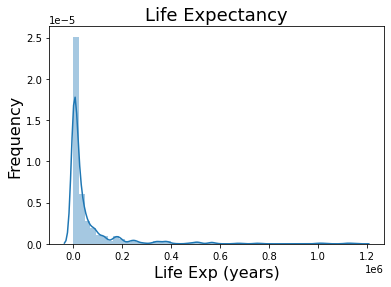

In [75]:
sns.distplot(df_rs_qty_gn_rcn['PricePerUnit'])
plt.title('Life Expectancy', fontsize=18)
plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

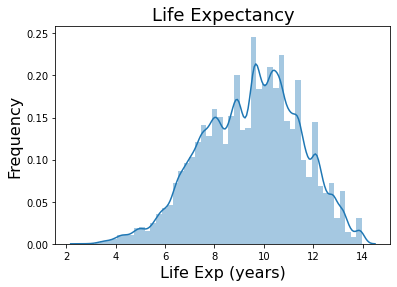

In [76]:
df_rs_qty_gn_rcn['log_price'] = np.log(df_rs_qty_gn_rcn['PricePerUnit'])
sns.distplot(df_rs_qty_gn_rcn['log_price'])
plt.title('Life Expectancy', fontsize=18)
plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

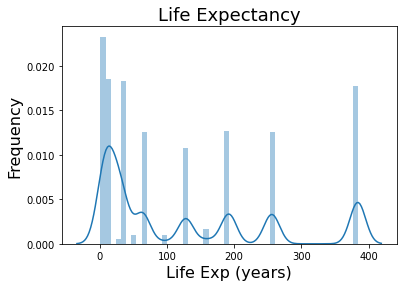

In [77]:
sns.distplot(df_rs_qty_gn_rcn['Memory'])
plt.title('Life Expectancy', fontsize=18)
plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

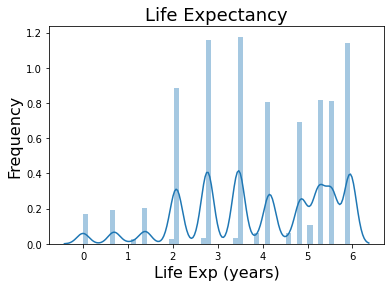

In [147]:
df_rs_qty_gn_rcn['Memory'] = np.log(df_rs_qty_gn_rcn['Memory'])
sns.distplot(df_rs_qty_gn_rcn['Memory'])
plt.title('Life Expectancy', fontsize=18)
plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [148]:
sns.distplot(df_rs_qty_gn_rcn['vCPU'])
plt.title('Life Expectancy', fontsize=18)
plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

KeyError: 'vCPU'

In [149]:
df_rs_qty_gn_rcn.dtypes

LeaseContractLength      int64
OfferingClass            int64
Location                 int64
Memory                 float64
Network_Performance      int64
Year                     int64
log_price              float64
dtype: object

In [80]:
df_rs_qty_gn_rcn = df_rs_qty_gn_rcn.drop(columns='PricePerUnit')
df_rs_qty_gn_rcn

,LeaseContractLength,OfferingClass,Location,Memory,vCPU,Network_Performance,Clock_Speed,Year,log_price
4,3,2,3,8,2.0,5,2.4,2,8.849657
14,3,1,5,8,2.0,4,3.3,1,7.614805
27,3,1,1,192,48.0,9,4.5,4,9.944390
28,1,1,6,384,96.0,5,2.5,4,10.605817
73,3,2,5,384,96.0,8,3.1,3,11.652209
...,...,...,...,...,...,...,...,...,...
1897237,1,2,4,8,2.0,2,3.1,3,7.101676
1897243,3,1,6,4,2.0,1,3.1,4,7.940940
1897246,1,2,5,64,16.0,2,3.1,2,10.992302
1897247,3,1,5,16,4.0,7,4.5,4,9.115040


<AxesSubplot:>

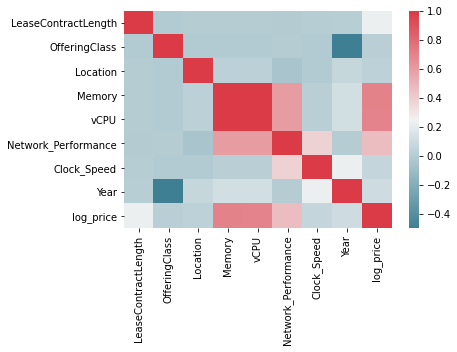

In [81]:
corr = df_rs_qty_gn_rcn.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [82]:
# We have to remove Memory or CPU, Because it has same high relationship between thoose values, then we just enough one value
df_rs_qty_gn_rcn = df_rs_qty_gn_rcn.drop(columns='vCPU')
df_rs_qty_gn_rcn

,LeaseContractLength,OfferingClass,Location,Memory,Network_Performance,Clock_Speed,Year,log_price
4,3,2,3,8,5,2.4,2,8.849657
14,3,1,5,8,4,3.3,1,7.614805
27,3,1,1,192,9,4.5,4,9.944390
28,1,1,6,384,5,2.5,4,10.605817
73,3,2,5,384,8,3.1,3,11.652209
...,...,...,...,...,...,...,...,...
1897237,1,2,4,8,2,3.1,3,7.101676
1897243,3,1,6,4,1,3.1,4,7.940940
1897246,1,2,5,64,2,3.1,2,10.992302
1897247,3,1,5,16,7,4.5,4,9.115040


In [83]:
import seaborn as sns 
import statsmodels.api as sm 

In [84]:
x = df_rs_qty_gn_rcn[df_rs_qty_gn_rcn.columns[df_rs_qty_gn_rcn.columns != 'log_price']]
y = df_rs_qty_gn_rcn.log_price
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 3.179e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:18:02   Log-Likelihood:            -3.0186e+05
No. Observations:              178499   AIC:                         6.037e+05
Df Residuals:                  178491   BIC:                         6.038e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.3499    

In [85]:
# We have to remove Clock_Speed column because, It has high p value (0.393)
df_rs_qty_gn_rcn = df_rs_qty_gn_rcn.drop(columns='Clock_Speed')
df_rs_qty_gn_rcn

,LeaseContractLength,OfferingClass,Location,Memory,Network_Performance,Year,log_price
4,3,2,3,8,5,2,8.849657
14,3,1,5,8,4,1,7.614805
27,3,1,1,192,9,4,9.944390
28,1,1,6,384,5,4,10.605817
73,3,2,5,384,8,3,11.652209
...,...,...,...,...,...,...,...
1897237,1,2,4,8,2,3,7.101676
1897243,3,1,6,4,1,4,7.940940
1897246,1,2,5,64,2,2,10.992302
1897247,3,1,5,16,7,4,9.115040


In [86]:
# According to result, we cannot use LinearRegression model for this dataset
# We can use neural network for this dataset

In [87]:
# def getModelsForColumns_RCN(dfName):
#     dfTemp_X = dfName.drop(columns=['log_price', 'Year', 'vCPU', 'Clock_Speed', 'OfferingClass', 'Location'])
#     dfTemp_y = dfName[['log_price']]
#     dfTemp_train_X, dfTemp_test_X, dfTemp_train_y, dfTemp_test_y = train_test_split(dfTemp_X, dfTemp_y, test_size = 0.2, random_state=18)
#     dfTemp_mod = LinearRegression()
#     dfTemp_mod.fit(dfTemp_train_X, dfTemp_train_y)
#     dfTemp_pred = dfTemp_mod.predict(dfTemp_test_X)
#     dfTemp_score = r2_score(dfTemp_test_y, dfTemp_pred)
#     return dfTemp_score


# dfTemp_score = getModelsForColumns_RCN(df_rs_qty_gn_rcn)
# print(str(dfTemp_score))

In [152]:
df_rs_qty_gn_rcn_X = df_rs_qty_gn_rcn.drop(columns=['log_price'])
df_rs_qty_gn_rcn_y = df_rs_qty_gn_rcn[['log_price']]
df_rqg_rcn_train_X, df_rqg_rcn_test_X, df_rqg_rcn_train_y, df_rqg_rcn_test_y = train_test_split(df_rs_qty_gn_rcn_X, df_rs_qty_gn_rcn_y, test_size = 0.2, random_state=18)

In [153]:
df_rs_qty_gn_rcn_X

,LeaseContractLength,OfferingClass,Location,Memory,Network_Performance,Year
4,3,2,3,2.079442,5,2
14,3,1,5,2.079442,4,1
27,3,1,1,5.257495,9,4
28,1,1,6,5.950643,5,4
73,3,2,5,5.950643,8,3
...,...,...,...,...,...,...
1897237,1,2,4,2.079442,2,3
1897243,3,1,6,1.386294,1,4
1897246,1,2,5,4.158883,2,2
1897247,3,1,5,2.772589,7,4


In [154]:
# Reserve 10,000 samples for validation
df_rqg_rcn_train_X_val = df_rqg_rcn_train_X[-10000:]
df_rqg_rcn_train_y_val = df_rqg_rcn_train_y[-10000:]
df_rqg_rcn_train_X = df_rqg_rcn_train_X[:-10000]
df_rqg_rcn_train_y = df_rqg_rcn_train_y[:-10000]

In [155]:
df_rqg_rcn_train_X

,LeaseContractLength,OfferingClass,Location,Memory,Network_Performance,Year
834512,1,2,5,5.257495,9,4
821842,3,1,5,4.852030,2,4
122323,3,2,2,2.079442,2,3
1287715,3,2,1,5.257495,3,3
253126,3,2,5,5.545177,5,2
...,...,...,...,...,...,...
1158037,3,2,5,2.079442,5,1
339442,3,2,1,5.950643,8,2
769706,3,1,5,2.772589,6,1
71335,1,1,3,2.772589,7,4


In [156]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.keras as keras
from tensorflow.keras import layers

In [168]:
# GRADED FUNCTION: house_model
def house_model(xs, ys,shape,epochs):
    m = Sequential()
    m.add(Dense(6, activation='relu', input_dim=shape))
    # m.add(Dense(4, activation='relu', kernel_initializer='normal'))
    m.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(xs, ys, batch_size=64,epochs=epochs, verbose=2)
    return model

In [169]:
history = house_model(df_rqg_rcn_train_X, df_rqg_rcn_train_y, 6, 5)

Epoch 1/5
2075/2075 - 2s - loss: nan
Epoch 2/5
2075/2075 - 1s - loss: nan
Epoch 3/5
2075/2075 - 1s - loss: nan
Epoch 4/5
2075/2075 - 1s - loss: nan
Epoch 5/5
2075/2075 - 1s - loss: nan


In [159]:
history.history

In [160]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = history.evaluate(df_rqg_rcn_test_X, df_rqg_rcn_test_y, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
279/279 [==============================] - 0s 1ms/step - loss: nan
test loss, test acc: nan


In [161]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(df_rqg_rcn_test_X[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 6)
